In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

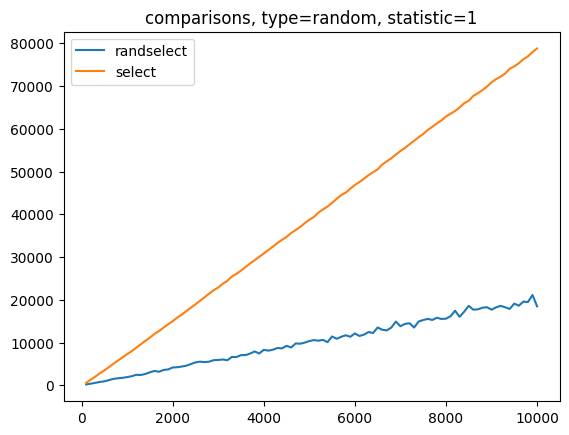

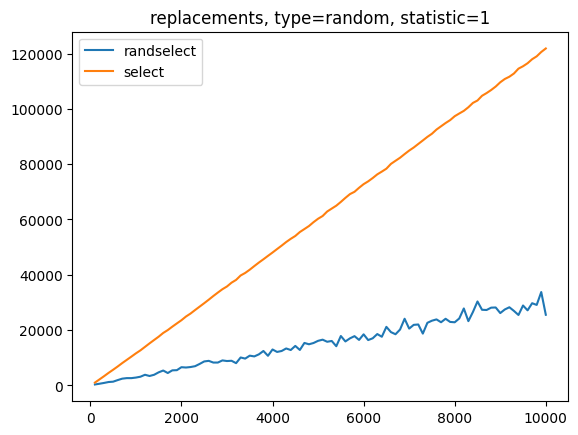

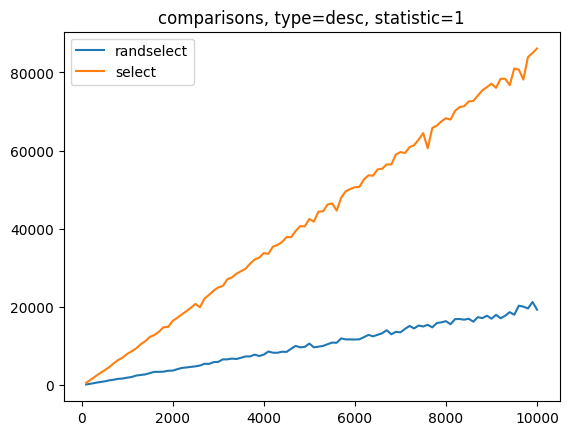

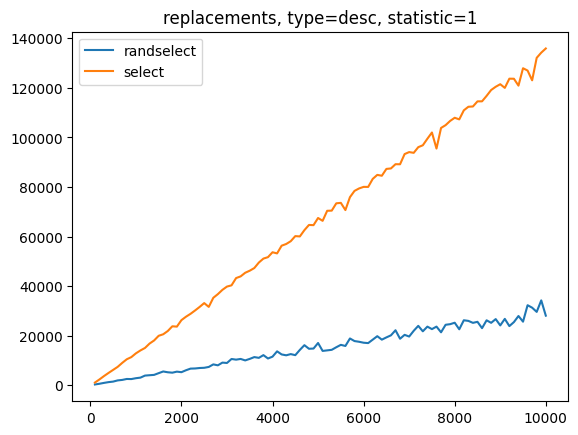

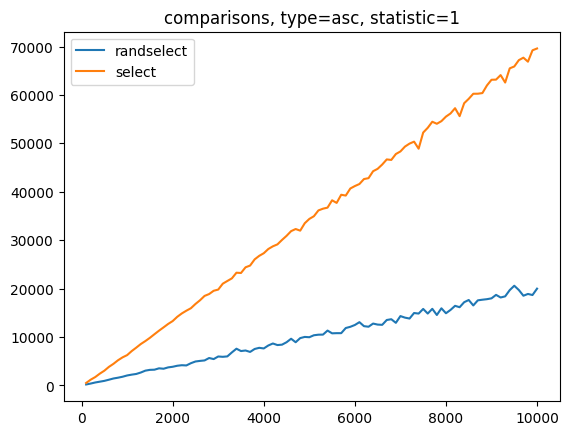

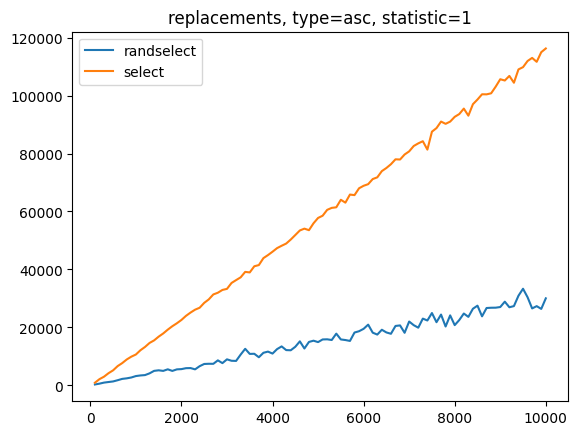

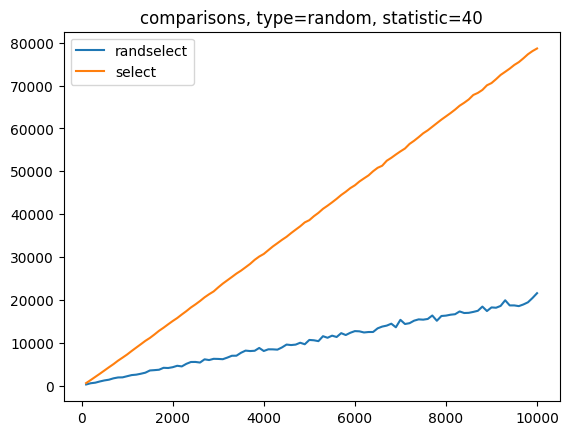

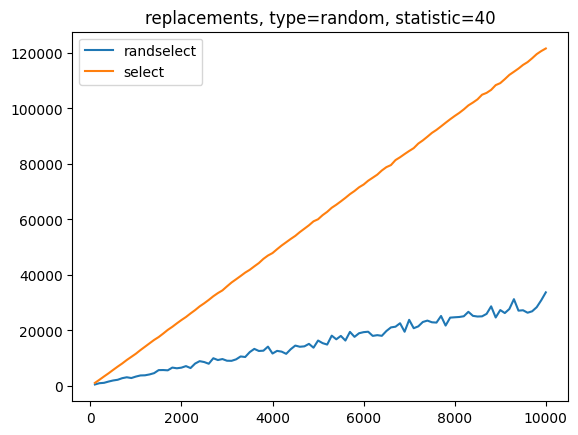

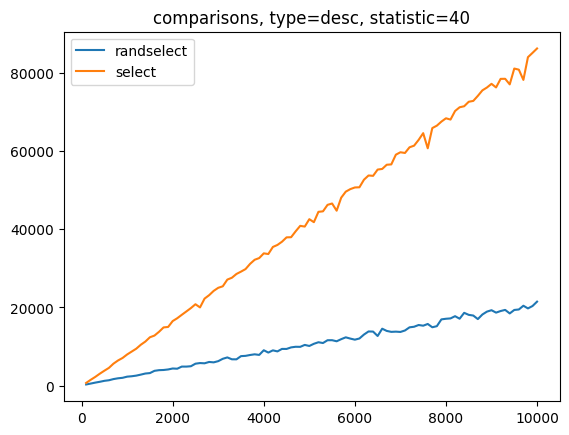

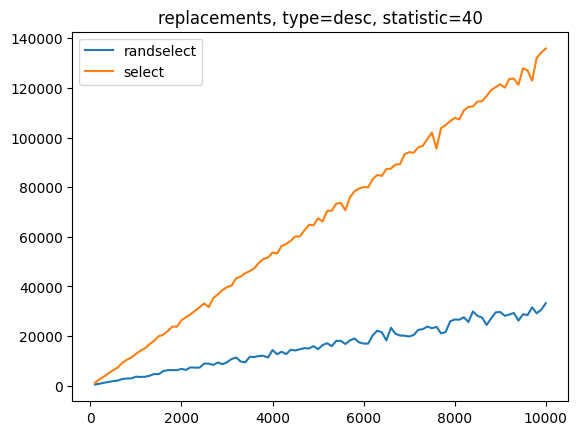

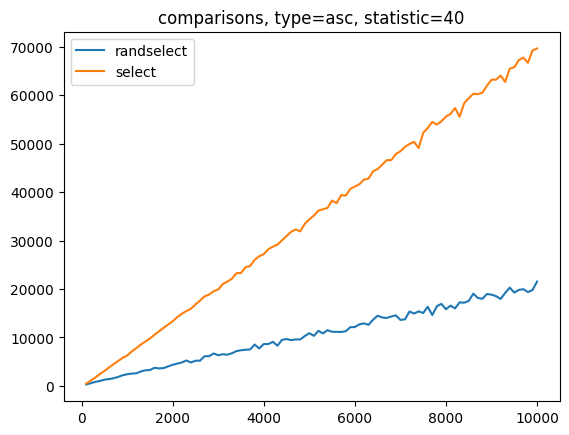

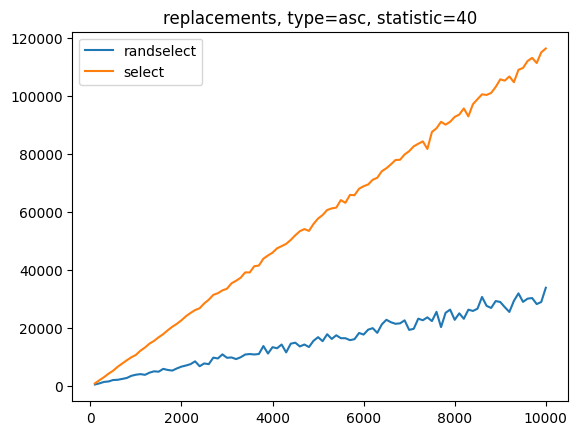

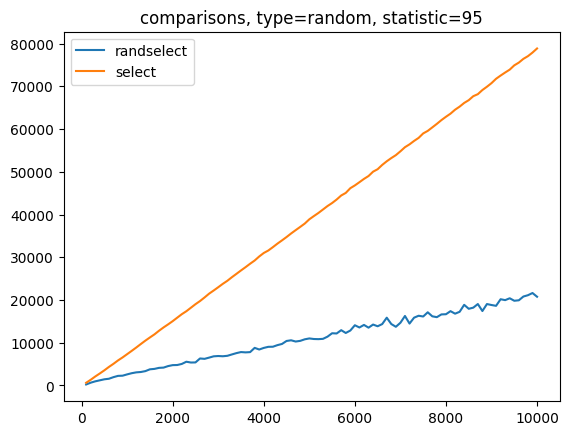

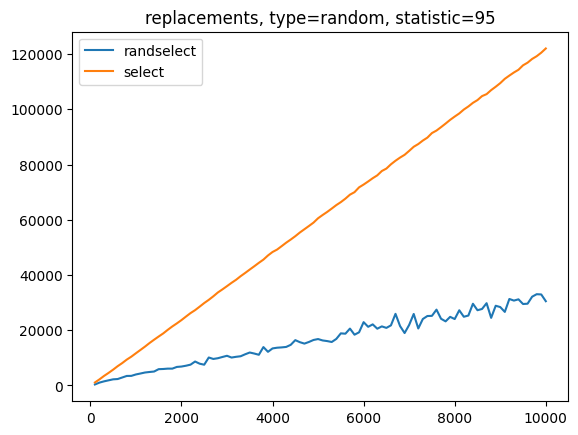

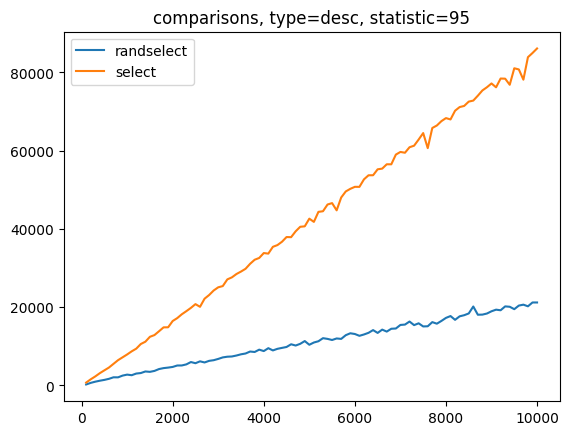

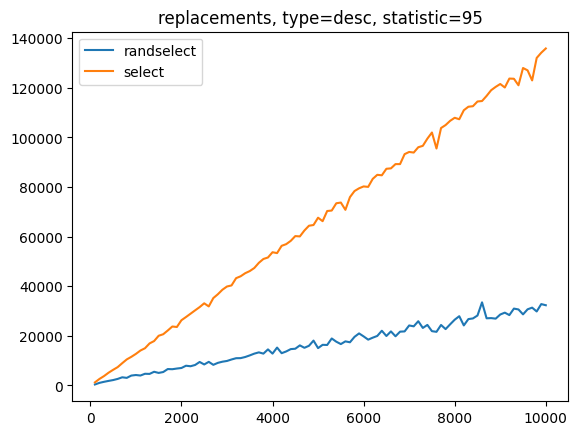

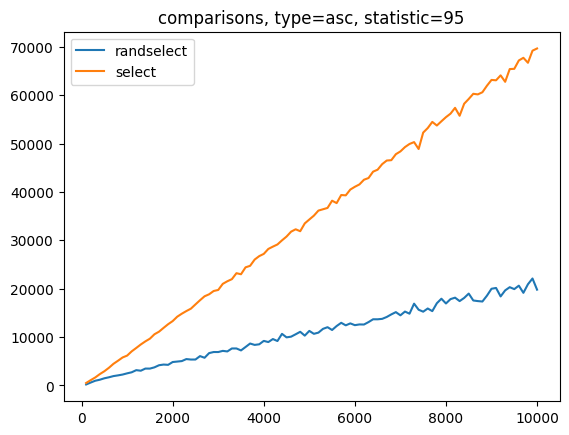

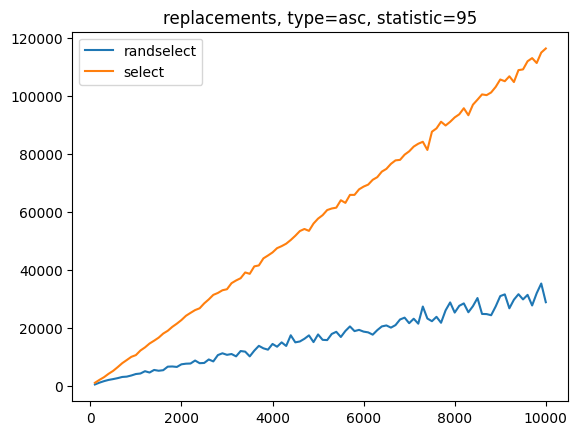

In [2]:
data_begin = 100                                            # beginning of data range
data_end = 10000                                            # end of data range (inclusive)
data_step = 100                                             # data range step
data_range = np.arange(data_begin, data_end + 1, data_step) # array of data values
data_size = len(data_range)                                 # length of the data values array

m = 100 # number of repeats for a single experiment

for k in [1, 40, 95]: # positional statistic value
    
    for t in ["random", "desc", "asc"]: # type of the input data

        randselect_comparisons = np.zeros(data_size, int)
        randselect_replacements = np.zeros(data_size, int)
        select_comparisons = np.zeros(data_size, int)
        select_replacements = np.zeros(data_size, int)

        for n in data_range: # size of the input

            # read results and sum them

            randselect_data = open(f"results/randselect_{t}_{k}_{n}.txt", "r")
            for result in randselect_data.readlines():
                result_split = result.rstrip("\n").split(" ")
                result_split = [eval(i) for i in result_split]
                randselect_comparisons[n // data_step - 1] += result_split[0]
                randselect_replacements[n // data_step - 1] += result_split[1]
           
            select_data = open(f"results/select_{t}_{k}_{n}.txt", "r")
            for result in select_data.readlines():
                result_split = result.rstrip("\n").split(" ")
                result_split = [eval(i) for i in result_split]
                select_comparisons[n // data_step - 1] += result_split[0]
                select_replacements[n // data_step - 1] += result_split[1]
            
        # take the average
        
        randselect_comparisons = randselect_comparisons / m
        randselect_replacements = randselect_replacements / m
        select_comparisons = select_comparisons / m
        select_replacements = select_replacements / m
        
        # plot the averages

        plt.plot(data_range, randselect_comparisons, label="randselect")
        plt.plot(data_range, select_comparisons, label="select")
        plt.title(f"comparisons, type={t}, statistic={k}")
        plt.legend()
        plt.show()
        plt.plot(data_range, randselect_replacements, label="randselect")
        plt.plot(data_range, select_replacements, label="select")
        plt.title(f"replacements, type={t}, statistic={k}")
        plt.legend()
        plt.show()
    